# Importing required Libraries and the Dataset.

In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows use of Display() for Dataframes.

# Import supplementary visualization code visuals.py
import visuals as vs

%matplotlib inline 

data = pd.read_csv("autism_data.csv")
display(data.head(5))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [2]:
# Total number of records:
n_records = len(data.index)

# Total number of records with ASD 
n_asd_yes = len(data[data['Class/ASD'] == 'YES'])

# Total number of records without ASD
n_asd_no = len(data[data['Class/ASD'] == 'NO'])

# Percentage of individuals with ASD
yes_percentage = float((n_asd_yes) / n_records * 100)

# Printing the outputs
print(f'Total number of records  : {n_records}')
print(f'Number of individuals with ASD : {n_asd_yes}')
print(f'Number of individuals without ASD : {n_asd_no}')
print("Percentage of individuals with ASD : {:.2f}%".format(yes_percentage))

Total number of records  : 704
Number of individuals with ASD : 189
Number of individuals without ASD : 515
Percentage of individuals with ASD : 26.85%


## Featureset Exploration 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [4]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


## Preparing the Data 

In [5]:
data.isna().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

##### Dropping missing values 

In [6]:
data.dropna(inplace=True)
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,0.723647,0.452991,0.458689,0.497151,0.498575,0.284900,0.417379,0.650997,0.324786,0.574074,29.698006,4.883191
std,0.447512,0.498140,0.498646,0.500348,0.500354,0.451689,0.493478,0.476995,0.468629,0.494835,16.507465,2.498051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [7]:
# After Data Cleaning

# Total number of records:
n_records = len(data.index)

# Total number of records with ASD 
n_asd_yes = len(data[data['Class/ASD'] == 'YES'])

# Total number of records without ASD
n_asd_no = len(data[data['Class/ASD'] == 'NO'])

# Printing the outputs
print("AFTER REMOVING NULL VALUES : ")
print(f'Total number of records  : {n_records}')
print(f'Number of individuals with ASD : {n_asd_yes}')
print(f'Number of individuals without ASD : {n_asd_no}')


AFTER REMOVING NULL VALUES : 
Total number of records  : 702
Number of individuals with ASD : 189
Number of individuals without ASD : 513


### Visualizations with Seaborn

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

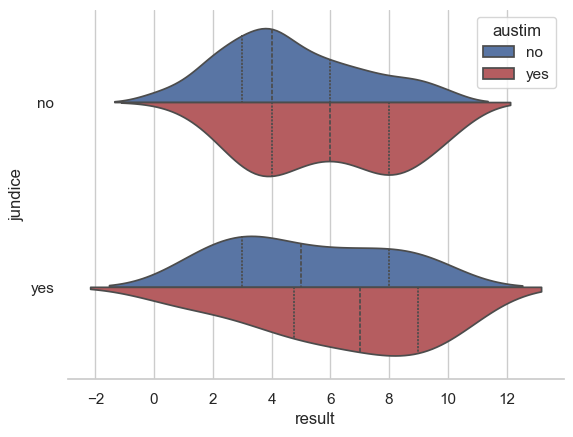

In [9]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="result", y="jundice", hue="austim", data=data, split=True,inner="quart", palette={'yes': "r", 'no': "b"})
sns.despine(left=True)

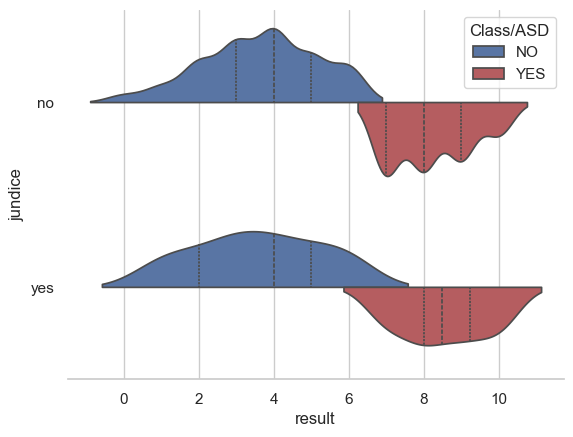

In [10]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="result", y="jundice", hue="Class/ASD", data=data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

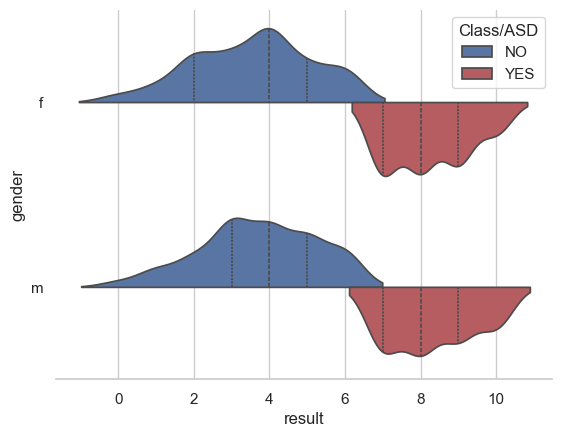

In [11]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="result", y="gender", hue="Class/ASD", data=data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

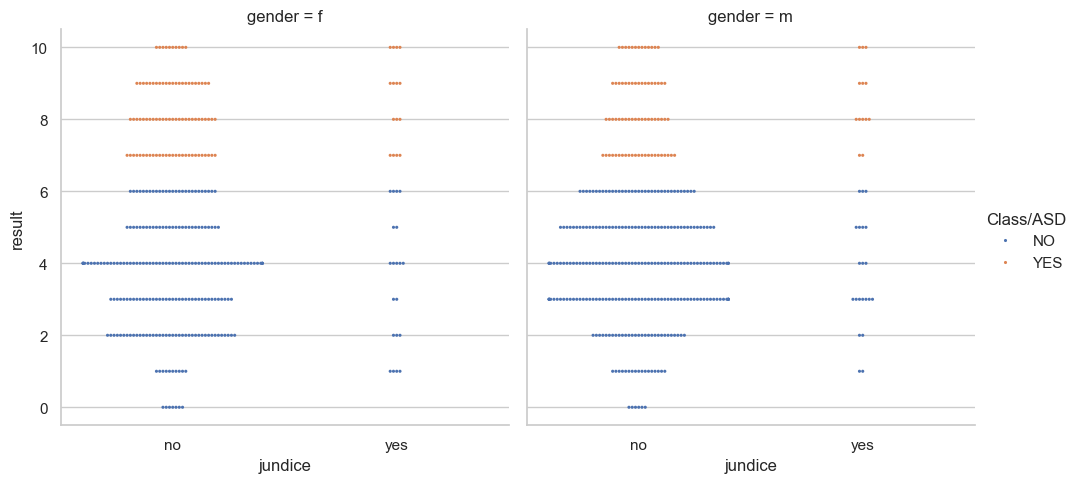

In [12]:
sns.catplot(x="jundice", y="result", hue="Class/ASD", s = 5, col="gender", data=data, kind="swarm");

Convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Let's create an array that extracts only the feature data we want to work with and another array that contains the classes (class/ASD).

In [13]:
data_raw = data['Class/ASD']
features_raw = data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result',
                      'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

Data Preprocessing : using MinMaxScaler()

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num = ['age','result']
features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[num] = scaler.fit_transform(features_raw[num])

In [15]:
display(features_minmax_transform.head(5))

,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.024590,f,White-European,no,no,United States,0.6,Self,1,1,1,1,0,0,1,1,0,0
1,0.019126,m,Latino,no,yes,Brazil,0.5,Self,1,1,0,1,0,0,0,1,0,1
2,0.027322,m,Latino,yes,yes,Spain,0.8,Parent,1,1,0,1,1,0,1,1,1,1
3,0.049180,f,White-European,no,yes,United States,0.6,Self,1,1,0,1,0,0,1,1,0,1
4,0.062842,f,?,no,no,Egypt,0.2,?,1,0,0,0,0,0,0,1,0,0


### One-Hot Encoding on features_minmax_transform

In [16]:
features_final = pd.get_dummies(features_minmax_transform)
features_final.head(5)

,age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,...,contry_of_res_United Kingdom,contry_of_res_United States,contry_of_res_Uruguay,contry_of_res_Viet Nam,relation_?,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self
0,0.024590,0.6,1,1,1,1,0,0,1,1,...,False,True,False,False,False,False,False,False,False,True
1,0.019126,0.5,1,1,0,1,0,0,0,1,...,False,False,False,False,False,False,False,False,False,True
2,0.027322,0.8,1,1,0,1,1,0,1,1,...,False,False,False,False,False,False,False,True,False,False
3,0.049180,0.6,1,1,0,1,0,0,1,1,...,False,True,False,False,False,False,False,False,False,True
4,0.062842,0.2,1,0,0,0,0,0,0,1,...,False,False,False,False,True,False,False,False,False,False


### Encode all classes data to numerical values

In [17]:
data_classes = data_raw.apply(lambda x : 1 if x == 'YES' else 0)

In [18]:
encoded = list(features_final.columns)
print("{} total features after one-hot encoding".format(len(encoded)))
print(encoded)

103 total features after one-hot encoding
['age', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f', 'gender_m', 'ethnicity_?', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern ', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish', 'ethnicity_White-European', 'ethnicity_others', 'jundice_no', 'jundice_yes', 'austim_no', 'austim_yes', 'contry_of_res_Afghanistan', 'contry_of_res_AmericanSamoa', 'contry_of_res_Angola', 'contry_of_res_Argentina', 'contry_of_res_Armenia', 'contry_of_res_Aruba', 'contry_of_res_Australia', 'contry_of_res_Austria', 'contry_of_res_Azerbaijan', 'contry_of_res_Bahamas', 'contry_of_res_Bangladesh', 'contry_of_res_Belgium', 'contry_of_res_Bolivia', 'contry_of_res_Brazil', 'contry_of_res_Burundi', 'contry_of_res_Canada', 'contry_of_res_Chile', 'contry_of_res_China', 'contry_of_res_Cos

Text(0, 0.5, 'Frequency')

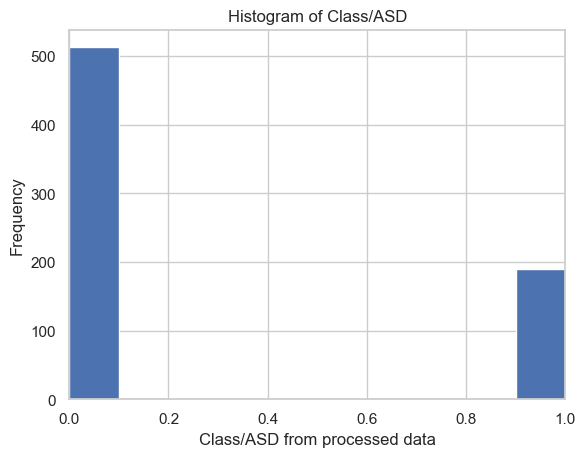

In [19]:
plt.hist(data_classes, bins=10)
plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')

## Shuffle and Split the data
All the categorical variables have been converted to numerical variables and have been normalized, we split the data into train and test set, test set will be 20% of the total data.

In [20]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(features_final,data_classes,test_size=0.2, random_state=1)
print("Train set has {} enteries.".format(X_train.shape[0]))
print("Test set has {} enteries.".format(X_test.shape[0]))

Train set has 561 enteries.
Test set has 141 enteries.


## Models : 

### 1. Decision Tress

In [21]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dec_model = DecisionTreeClassifier()
dec_model.fit(X_train.values, y_train)

DecisionTreeClassifier()

In [22]:
y_pred = dec_model.predict(X_test.values)
print('True : ', y_test.values[0:25])
print('False :', y_pred[0:25])

True :  [1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0]
False : [1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0]


In [23]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
TP = cm[1,1]
FP = cm[0,1]
TN = cm[0,0]
FN = cm[1,0]

[[101   0]
 [  0  40]]


In [24]:
print('Accuracy:')
print((TN+TP)/float(TP+TN+FP+FN))
print('Error:')
print((FP+FN)/float(TP+TN+FP+FN))
print('Precision:')
print(metrics.precision_score(y_test,y_pred))
print('Score:')
print(dec_model.score(X_test.values, y_test))

Accuracy:
1.0
Error:
0.0
Precision:
1.0
Score:
1.0


### 2. Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rndm_model = RandomForestClassifier(n_estimators=5, random_state=1)
cv_score = cross_val_score(rndm_model, features_final, data_classes, cv =10)
cv_score.mean()

np.float64(0.9900603621730383)

In [26]:
# F-beta Score
rndm_model.fit(X_train.values, y_train)
from sklearn.metrics import fbeta_score
y_pred = rndm_model.predict(X_test.values)
fbeta_score(y_test, y_pred, average='binary', beta=0.5)

1.0

### 3. Support Vector Machine

In [27]:
from sklearn import svm
svm_model = svm.SVC(kernel='linear', C=1, gamma=2)
cv_score = cross_val_score(svm_model, features_final, data_classes, cv =10)
cv_score.mean()

np.float64(1.0)

In [28]:
#F-beta Score
svm_model.fit(X_train.values, y_train)
from sklearn.metrics import fbeta_score
y_pred = svm_model.predict(X_test.values)
fbeta_score(y_test, y_pred, average='binary', beta=0.5)

1.0

### 4. K-Nearest-Neighbors(KNN)

In [29]:
from sklearn import neighbors
knn_model = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_score = cross_val_score(knn_model, features_final, data_classes, cv =10)
cv_score.mean()

np.float64(0.9458752515090543)

In [30]:
#F-beta Score
knn_model.fit(X_train.values, y_train)
from sklearn.metrics import fbeta_score
y_pred = knn_model.predict(X_test.values)
fbeta_score(y_test, y_pred, average='binary', beta=0.5)

0.9183673469387755

In [31]:
for n in range(10,30):
    knn_model = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn_model, features_final, data_classes, cv=10)
    print (n, cv_scores.mean())

10 0.9458752515090543
11 0.9473239436619719
12 0.9444869215291751
13 0.9501609657947686
14 0.9458953722334005
15 0.9458953722334004
16 0.951569416498994
17 0.951549295774648
18 0.9529778672032194
19 0.9572635814889336
20 0.9529778672032194
21 0.9529778672032194
22 0.9486921529175051
23 0.9472635814889336
24 0.9486921529175051
25 0.9486720321931589
26 0.9515090543259557
27 0.9501006036217303
28 0.9486720321931589
29 0.9472434607645874


Hence, K is not making any significant difference on accuracy of our predictions.

### 5. Naive Bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
cv_score = cross_val_score(nb_model, features_final, data_classes, cv =10)
cv_score.mean()

np.float64(0.8746277665995976)

In [33]:
#F-beta Score
nb_model.fit(X_train.values, y_train)
from sklearn.metrics import fbeta_score
y_pred = nb_model.predict(X_test.values)
fbeta_score(y_test, y_pred, average='binary', beta=0.5)

0.7675438596491229

### 6. Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
cv_score = cross_val_score(lr_model, features_final, data_classes, cv =10)
cv_score.mean()

np.float64(0.9971428571428571)

In [35]:
#F-beta Score
lr_model.fit(X_train.values, y_train)
from sklearn.metrics import fbeta_score
y_pred = lr_model.predict(X_test.values)
fbeta_score(y_test, y_pred, average='binary', beta=0.5)

0.9948979591836735

## Model Tuning 

In [36]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC


In [37]:
def f_beta_score(y_true, y_predict):
    return fbeta_score(y_true, y_predict, beta = 0.5)
clf = SVC(random_state = 1)
parameters = {'C':range(1,6),'kernel':['linear','poly','rbf','sigmoid'],'degree':range(1,6)}
scorer = make_scorer(f_beta_score)

In [38]:
grid_obj = GridSearchCV(estimator = clf, param_grid = parameters, scoring = scorer)
grid_fit = grid_obj.fit(X_train.values, y_train)
best_clf = grid_fit.best_estimator_

In [39]:
predictions = (clf.fit(X_train.values, y_train)).predict(X_test.values)
best_predictions = best_clf.predict(X_test.values)

In [40]:
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.9645
F-score on testing data: 0.9574

Optimized Model
------
Final accuracy score on the testing data: 1.0000
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import pickle

# Load the dataset
data = pd.read_csv("autism_data.csv")

# Check for null values
print("Null values in dataset:")
print(data.isna().sum())

# Handle null values (e.g., drop rows with NaN in 'age')
data_cleaned = data.dropna(subset=['age'])  # Drops the 2 rows with missing age
print(f"Rows after dropping null values: {len(data_cleaned)}")  # Should be 702

# Separate features and target
features_raw = data_cleaned[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 
                            'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 
                            'age', 'gender', 'ethnicity', 'jundice', 'austim', 
                            'contry_of_res', 'result', 'relation']]
data_classes = data_cleaned['Class/ASD']

# Preprocessing: Scale numerical features
scaler = MinMaxScaler()
num_cols = ['age', 'result']
features_minmax_transform = pd.DataFrame(data=features_raw)
features_minmax_transform[num_cols] = scaler.fit_transform(features_raw[num_cols])

# Preprocessing: One-Hot Encoding for categorical variables
features_final = pd.get_dummies(features_minmax_transform)
print(f"Number of features after encoding: {len(features_final.columns)}")

# Train the SVM model (using the optimized parameters from your document)
svm_model = SVC(kernel='linear', C=1, gamma=2, random_state=1)
svm_model.fit(features_final.values, data_classes)

# Verify the model works by checking a sample prediction
sample = features_final.iloc[0:1]  # First row
prediction = svm_model.predict(sample.values)
print(f"Sample prediction: {prediction[0]}")

# Save the model to a .pkl file
with open("svm_model.pkl", "wb") as file:
    pickle.dump(svm_model, file)
print("Model saved as 'svm_model.pkl'")

# Save the feature columns (for alignment in backend)
feature_columns = features_final.columns.tolist()
with open("feature_columns.pkl", "wb") as file:
    pickle.dump(feature_columns, file)
print("Feature columns saved as 'feature_columns.pkl'")

Null values in dataset:
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64
Rows after dropping null values: 702
Number of features after encoding: 103
Sample prediction: NO
Model saved as 'svm_model.pkl'
Feature columns saved as 'feature_columns.pkl'


In [2]:
with open("svm_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)
with open("feature_columns.pkl", "rb") as file:
    loaded_columns = pickle.load(file)
print("Model loaded successfully")
print(f"Number of feature columns: {len(loaded_columns)}")

Model loaded successfully
Number of feature columns: 103
